In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
data=pd.read_excel('/content/gen_ai_project_data_cleaned.xlsx')

data=data.drop(columns=data.columns[[0, 1]], axis=1)

data=data.fillna(0)
print(data.isnull().sum())
data.rename(columns={'SR': 'target'}, inplace=True)
print(data)















PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
SO2        0
CO         0
Ozone      0
Benzene    0
Toluene    0
Temp       0
RH         0
WS         0
WD         0
BP         0
Xylene     0
AT         0
SR         0
dtype: int64
     PM2.5    PM10     NO    NO2    NOx    NH3    SO2    CO  Ozone  Benzene  \
0    65.10  107.53   2.37  19.85  12.48  10.43   9.05  0.61  38.06     0.61   
1    74.23  113.42   2.45  21.28  13.27  10.18   8.89  0.64  37.91     0.60   
2    81.83  123.53   2.59  22.27  13.92   9.86  11.25  0.69  37.94     0.61   
3    66.04  121.96   2.44  25.01  14.56  10.09  10.85  0.69  38.15     0.61   
4    58.38  106.22   2.12  25.46  14.51   9.47  11.03  0.79  38.59     0.64   
..     ...     ...    ...    ...    ...    ...    ...   ...    ...      ...   
437  30.62  112.89  14.12  30.21  22.96  19.29   6.03  0.72  50.17     0.81   
438  28.25   95.54  13.85  29.64  22.02  18.92   5.88  1.01  49.70     0.80   
439  21.31   91.82  14.00  29

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
X = data.drop('target', axis=1)
y = data['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')






































/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=200, batch_size=32, callbacks=[early_stop])

Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 8153.1255 - val_loss: 8358.6143
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 8071.9116 - val_loss: 8316.4561
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 7918.2676 - val_loss: 8251.9854
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 7717.5933 - val_loss: 8157.8047
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7735.1128 - val_loss: 8035.5312
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7308.3262 - val_loss: 7873.8721
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7058.7373 - val_loss: 7661.5825
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6964.7158 - val_loss: 7404.0195
Epoch 9/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6557.6660 - val_loss: 7084.0547
Epoch 10/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6176.6929 - val_loss: 6693.2358
Epoch 11/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5718.7412 - val_lo

In [ ]:
y_pred = model.predict(X_test).flatten()

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
MAE: 13.297473053434002
MSE: 578.1697640436993
RMSE: 24.04516092779791
R² Score: 0.32602356392104037


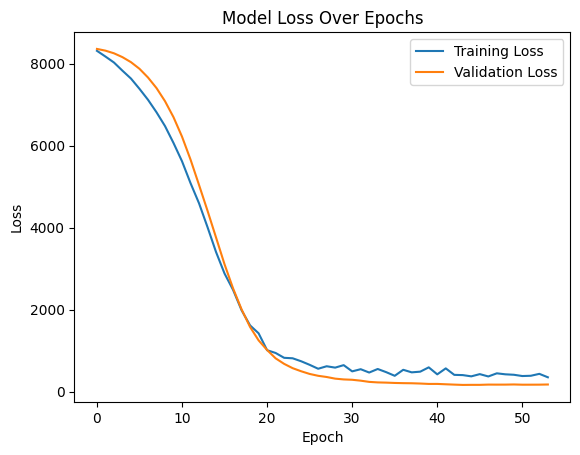

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss Over Epochs')
plt.legend()
plt.show()

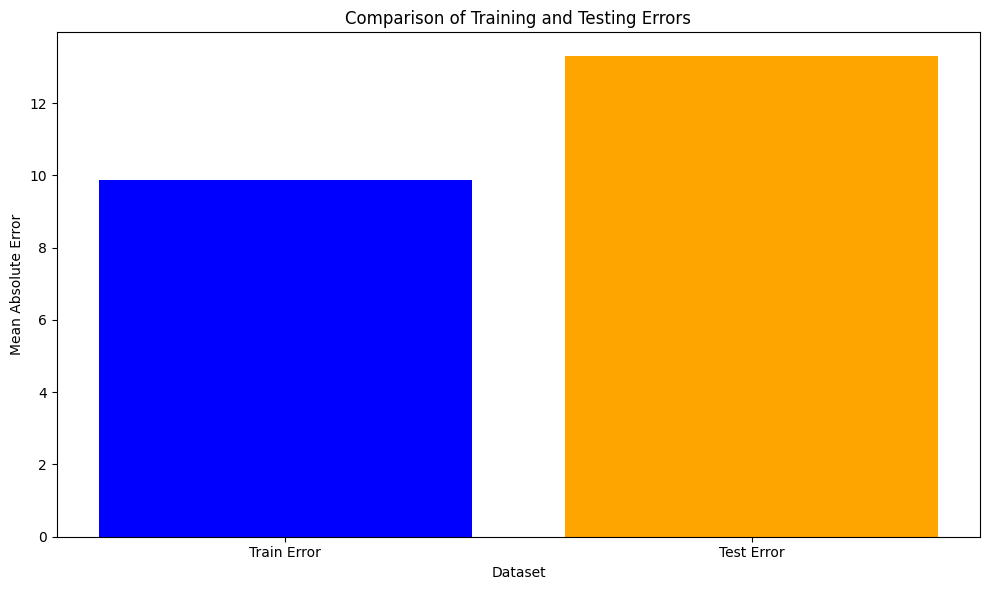

Training Errors (Individual): 225     7.748050
412     1.921516
118     1.447511
114    12.399615
364     7.422359
         ...    
106     1.492476
270     4.430057
348    10.810821
435     1.134295
102     6.193159
Name: target, Length: 309, dtype: float64
Testing Errors (Individual): 131     1.034273
25      4.383850
79      8.509080
284    11.382959
355    27.901708
         ...    
370    10.228670
395     4.212268
422     1.488349
311    21.494850
278    15.584305
Name: target, Length: 67, dtype: float64
Mean Training Error: 9.863955510796853
Mean Testing Error: 13.297473053434002


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


train_errors = np.abs(y_train - y_train_pred)
test_errors = np.abs(y_test - y_test_pred)


mean_train_error = np.mean(train_errors)
mean_test_error = np.mean(test_errors)


plt.figure(figsize=(10, 6))


labels = ['Train Error', 'Test Error']
mean_errors = [mean_train_error, mean_test_error]

plt.bar(labels, mean_errors, color=['blue', 'orange'])

plt.xlabel('Dataset')
plt.ylabel('Mean Absolute Error')
plt.title('Comparison of Training and Testing Errors')
plt.tight_layout()
plt.show()


print("Training Errors (Individual):", train_errors)
print("Testing Errors (Individual):", test_errors)
print(f"Mean Training Error: {mean_train_error}")
print(f"Mean Testing Error: {mean_test_error}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Train MAE: 9.863955510796853
Train R²: 0.6801680181689603
Test MAE: 13.297473053434002
Test R²: 0.32602356392104037


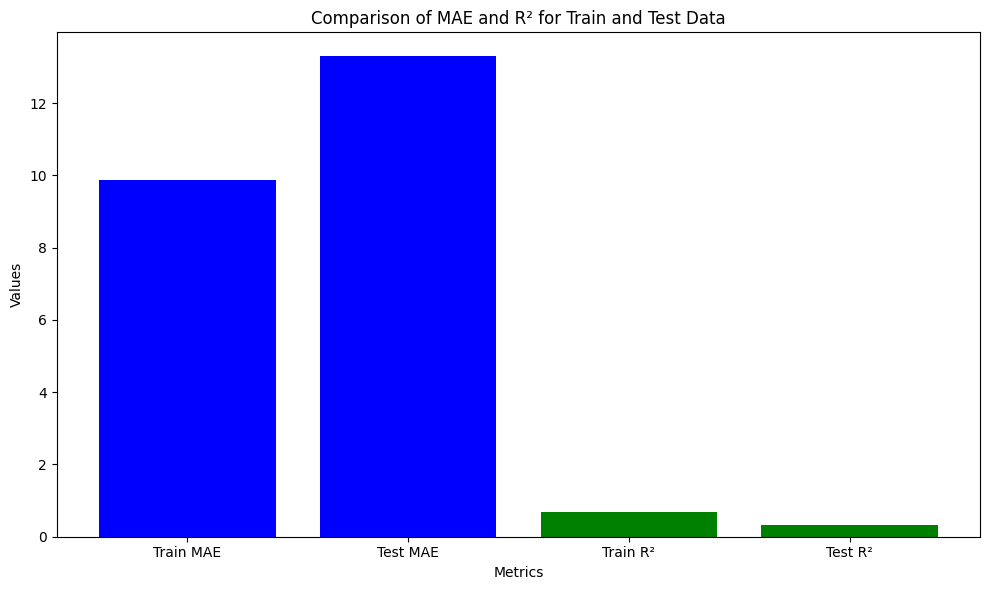

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


y_train_pred = model.predict(X_train).flatten()
y_test_pred = model.predict(X_test).flatten()


mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)


mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Train MAE:", mae_train)
print("Train R²:", r2_train)
print("Test MAE:", mae_test)
print("Test R²:", r2_test)

import matplotlib.pyplot as plt
import numpy as np


train_mae = mae_train
test_mae = mae_test
train_r2 = r2_train
test_r2 = r2_test


labels = ['Train MAE', 'Test MAE', 'Train R²', 'Test R²']
values = [train_mae, test_mae, train_r2, test_r2]


plt.figure(figsize=(10, 6))


x = np.arange(len(labels))
plt.bar(x, values, color=['blue', 'blue', 'green', 'green'])


plt.xticks(x, labels)
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Comparison of MAE and R² for Train and Test Data')


plt.tight_layout()
plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


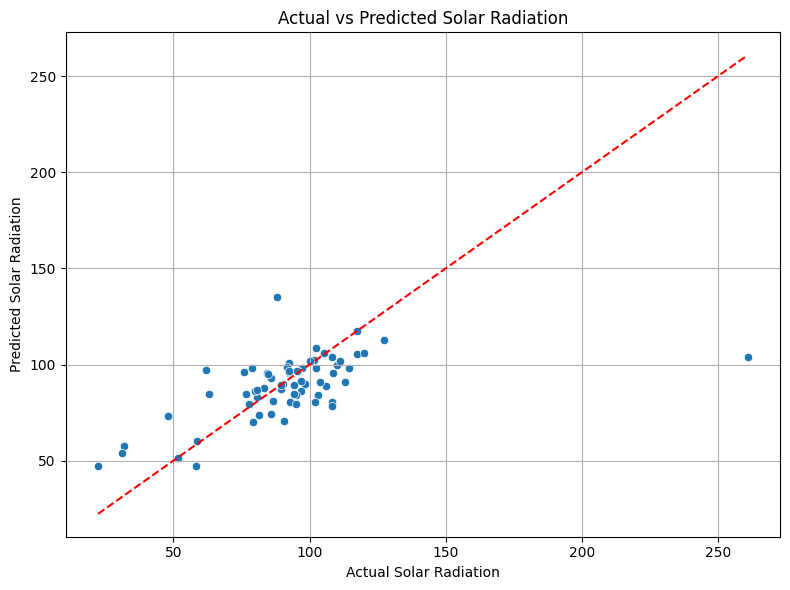

In [ ]:
import seaborn as sns
y_pred = model.predict(X_test).flatten()




plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # reference line
plt.xlabel('Actual Solar Radiation')
plt.ylabel('Predicted Solar Radiation')
plt.title('Actual vs Predicted Solar Radiation')
plt.grid(True)
plt.tight_layout()
plt.show()


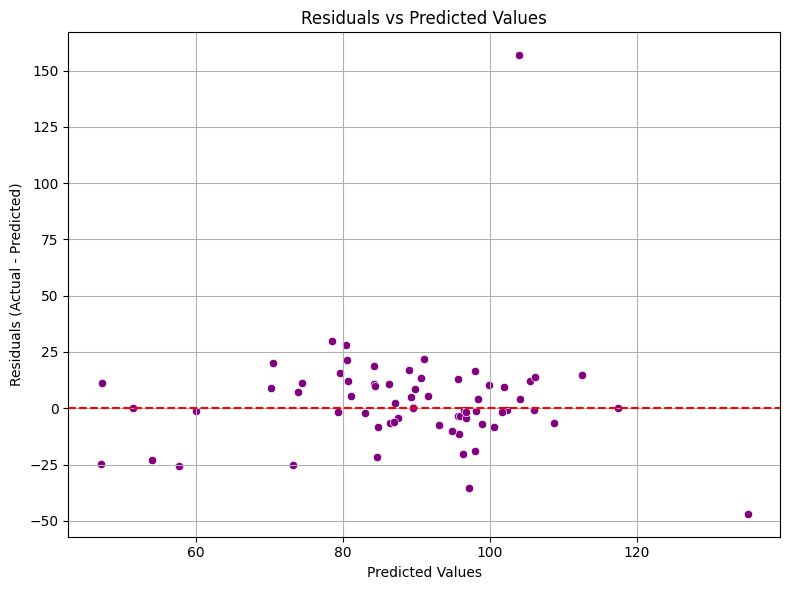

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals vs Predicted Values')
plt.grid(True)
plt.tight_layout()
plt.savefig("residuals_plot.png")
plt.show()
